In [102]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup


In [103]:
# Котировки нефти, курс eur/usd
dbc = pd.read_excel('cur_oil.xlsx')
dbc

,Date,EURUSD=X,OIL
0,2018-01-01,1.2005,NaN
1,2018-01-02,1.2012,59.15
2,2018-01-03,1.2063,59.15
3,2018-01-04,1.2010,59.15
4,2018-01-05,1.2069,60.44
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


In [104]:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

In [105]:
# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

In [107]:
df_cust = pd.DataFrame(customers)
df_cust

,Monty,Triangle,Stone,Poly
location,EU,CN,EU,EU
volumes,200,30,150,70
comment,moving_average,monthly,moving_average,monthly


In [115]:
#скидка
df_dis = pd.DataFrame(discounts, index=['discounts'])
df_dis

,up to 100,up to 300,300 plus
discounts,0.01,0.05,0.1


In [110]:
# Из данных есть:
# Цены на продукт А, который уже есть на рынке Европы
# ----- октябрь 2018 - 1600 евро
# ----- ноябрь 2018 - 1550 евро
# ----- февраль 2019 - 1600 евро

In [111]:
#цена на новый продукт - затраты нефть + производство
cost_mwp_eur = dbc['OIL']*16 + PRODUCTION_COST

In [112]:
dbc['cost_mwp_eur'] = cost_mwp_eur

In [116]:
dbc['cost_mwp_usd'] = cost_mwp_eur/ dbc['EURUSD=X'] 

In [117]:
dbc

,Date,EURUSD=X,OIL,cost_mwp_eur,cost_mwp_usd
0,2018-01-01,1.2005,NaN,NaN,NaN
1,2018-01-02,1.2012,59.15,1346.40,1120.879121
2,2018-01-03,1.2063,59.15,1346.40,1116.140264
3,2018-01-04,1.2010,59.15,1346.40,1121.065779
4,2018-01-05,1.2069,60.44,1367.04,1132.687049
...,...,...,...,...,...
341,2019-04-23,1.1259,67.72,1483.52,1317.630340
342,2019-04-24,1.1224,67.14,1474.24,1313.471133
343,2019-04-25,1.1153,66.37,1461.92,1310.786336
344,2019-04-26,1.1137,64.27,1428.32,1282.499776


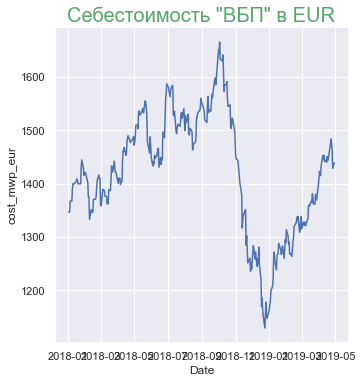

In [114]:
sns.set(style='darkgrid')  

sns.relplot(
    x='Date', 
    y='cost_mwp_eur', 
    data=dbc, 
#     data=snacks_sales[snacks_sales["Period"] < 300], 
    kind='line'
)
plt.title('Себестоимость "ВБП" в EUR', size=20, color='g');

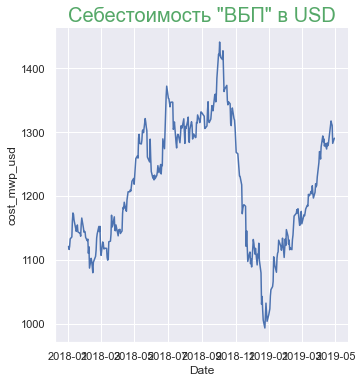

In [118]:
sns.set(style='darkgrid')  

sns.relplot(
    x='Date', 
    y='cost_mwp_usd', 
    data=dbc, 
#     data=snacks_sales[snacks_sales["Period"] < 300], 
    kind='line'
)
plt.title('Себестоимость "ВБП" в USD', size=20, color='g');

In [ ]:
#Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). 
#Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.

In [ ]:
#цена для клиента = цена в зависимости от локации* доставка в зависимости от локации*дисконт в завис от обьема